## Enron Scandal - Analysis 3

### Based on the people identified in the previos analysis, let's see what these guys have been talking about.

In [1]:
# The common functionality has been extracted and reused from the enronutil python module
import enronutil
# Other regular imports
from email.parser import Parser
import glob
import os
import datetime
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
# Change the value of this variable as per your directory structure
relative_path = '/Users/tanya/midterm/data/enron/maildir'

In [3]:
# Preparation for analysis
imp_emails_stage1 = []
imp_emails_stage2 = []
imp_emails_stage3 = []
unread_files = []

# The TRIO - CEO, COO and CFO
imp_people = ['kenneth.lay@enron.com', 'jeff.skilling@enron.com', 'andrew.fastow@enron.com']
start_tracking_date = datetime.date(1998, 1, 1)
resignation_date = datetime.date(2001, 8, 14)
bankruptcy_date = datetime.date(2001, 12, 2)
end_analysis_date = datetime.date(2002, 12, 31)

# Identified in previous analysis
linked_members_stage_1 = ['rob.bradley@enron.com', 'joe.hillings@enron.com', 
                  'jeffrey.garten@yale.edu', 'mark.lay@enron.com','sally.keepers@enron.com', 
                    'sherri.sera@enron.com','kevinscott@onlinemailbox.net', 
                    'eharris@insightpartners.com','joannie.williamson@enron.com',
                    'jeffrey.shankman@enron.com']

linked_members_stage_2 = ['enron_update@concureworkplace.com', 'l..wells@enron.com,'
                          ,'svarga@kudlow.com', 'nshaw@usenergyservices.com', 
                          'j..kean@enron.com', 'john@pgsenergy.com', 
                          'hema@izhuta.com','bpaddock@ghcf.org', 'news@real-net.net', 
                          '_corolla@response.etracks.com']

linked_members_stage_3 = ['svarga@kudlow.com', 'mailings@cnn.com', 
                          'lynda.l.phinney@williams.com', 
                          'enron_update@concureworkplace.com','jharwood@mindspring.com']

In [4]:
def action_word_bags(email_from, email_to, email_body, imp_email_stage_x, linked_members_stage_x):
    email_participants = [email_from] + email_to    
    participant_is_member_list = [p for p in email_participants if p in linked_members_stage_x]    
    if participant_is_member_list:
        return email_body.split()
    return []

## Let's plot word clouds of communications between the 'trio' and their favourite people

> ### First, let's plot the word clouds by looking at Kenneth Lay's mailbox.

In [5]:
# Action Function for word count
enronutil.reset_stages(imp_emails_stage1, imp_emails_stage2, imp_emails_stage3, unread_files)
enronutil.readRecursively(relative_path + '/lay-k', imp_emails_stage1, imp_emails_stage2, imp_emails_stage3, unread_files, action_word_bags)
print('Total words:', len(imp_emails_stage1), len(imp_emails_stage2), len(imp_emails_stage3))


Total words: 58047 9800 9994


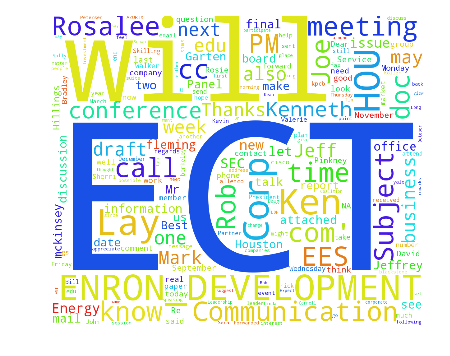

In [6]:
# Plot word clouds for conversation
#Stage 1
conversation_stopwords = [ 'Thank', 'you', 'Please', 'Enron']
conversation_stopwords.extend(STOPWORDS)
wordcloud = WordCloud(stopwords=conversation_stopwords,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(' '.join(imp_emails_stage1))


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

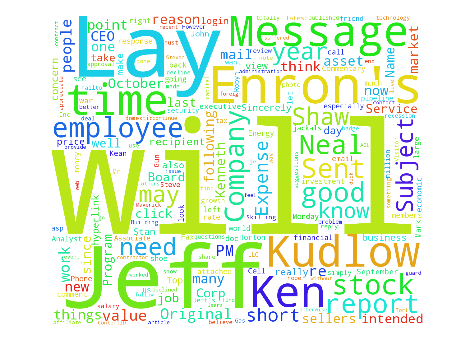

In [7]:
#Stage 2
conversation_stopwords = [ 'Thank', 'you', 'Please', 'Enron']
conversation_stopwords.extend(STOPWORDS)
wordcloud = WordCloud(stopwords=conversation_stopwords,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(' '.join(imp_emails_stage2))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

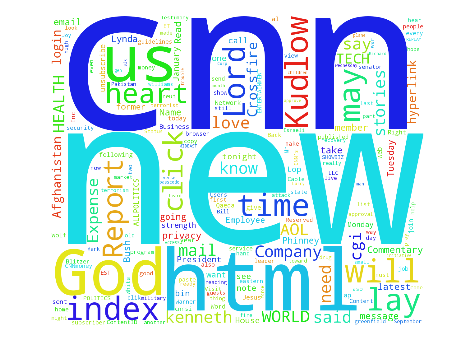

In [8]:
#Stage 3
conversation_stopwords = [ 'Thank', 'you', 'Please', 'Enron']
conversation_stopwords.extend(STOPWORDS)
wordcloud = WordCloud(stopwords=conversation_stopwords,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(' '.join(imp_emails_stage3))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

> ### Next, let's plot the word clouds by looking at Jeff Skilling's mailbox.

In [9]:
# Action Function for word count
enronutil.reset_stages(imp_emails_stage1, imp_emails_stage2, imp_emails_stage3, unread_files)
enronutil.readRecursively(relative_path + '/skilling-j', imp_emails_stage1, imp_emails_stage2, imp_emails_stage3, unread_files, action_word_bags)
print('Total words:', len(imp_emails_stage1), len(imp_emails_stage2), len(imp_emails_stage3))

Total words: 217068 10757 0


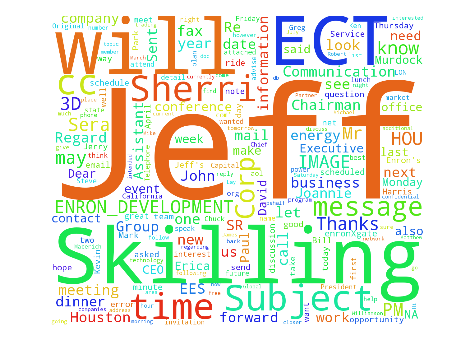

In [10]:
# Plot word clouds for conversation
#Stage 1
conversation_stopwords = [ 'Thank', 'you', 'Please', 'Enron']
conversation_stopwords.extend(STOPWORDS)
wordcloud = WordCloud(stopwords=conversation_stopwords,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(' '.join(imp_emails_stage1))


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

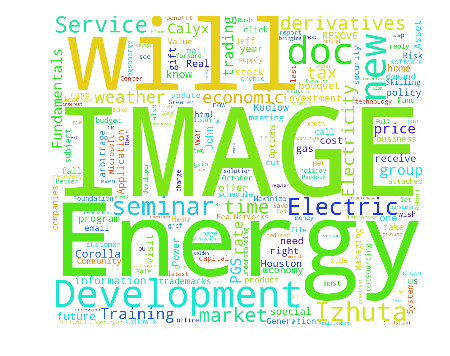

In [11]:
# Plot word clouds for conversation
#Stage 1
conversation_stopwords = [ 'Thank', 'you', 'Please', 'Enron']
conversation_stopwords.extend(STOPWORDS)
wordcloud = WordCloud(stopwords=conversation_stopwords,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(' '.join(imp_emails_stage2))


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Conclusion 3:

> ### Looking at the word clouds of conversations between the trio and other important people, the following conclusions can be drawn:
1. Stage 1 -> 'ECT' -> There was a lot of push towards shifting towards transitioning towards a energy-trade platform rather than stay the course of energy supplier.
2. Stage 2 - 'Derivatives', 'Stock' - There was a lot of talk around financial trading, which hints at Insider Trading.
3. Stage 3 -> 'CNN', 'Love', 'God', 'Pray', 'Heart' - Enron was beaten down by media and the government. But the employees continued supporting the company with 'love' and 'heart'.

> ### In addition, there are a lot of names - of people and places - that should be investigated next.